In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def fex2(N,tmax,E0,p):

    ED = E0
    E = E0 - ED

    delta=1

    for t in range(tmax):
        for i in range(N):
            dp = delta*(2*np.random.rand(3)-1) 
            i_p = np.random.randint(N)
            
            delta_E = np.linalg.norm(dp)**2/2 + np.dot(p[i_p, :], dp)
            
            if delta_E < 0:
                p[i_p, :] += dp
                ED += - delta_E
                E += delta_E
            else: 
                if ED >= delta_E:
                    p[i_p, :] += dp
                    ED += - delta_E
                    E += delta_E
                
    return p



In [3]:
N = 1000 #1e3
tmax = 1000
p0 = np.zeros((N,3))

p_max = 1
p_min = -1
n_bins = 50
dp = (p_max - p_min) / n_bins
binsP=np.arange(p_min+dp/2, p_max+dp/2, dp)
dx = 0.001
x_values = np.arange(p_min+dx/2, p_max+dx/2, dx)

In [4]:
# Calculos para E0=100
E0 = 100
p_100 = fex2(N,tmax,E0,p0)

p_100_1=p_100[:,1]

values, bins = np.histogram(p_100_1, bins=binsP)
values = values / (np.sum(values) * dp)


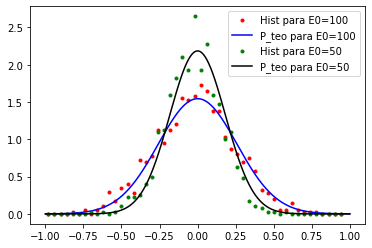

In [5]:
# Plot para E0=100

plt.figure(1)
plt.plot(bins[:-1], values, '.r')

T=2*E0/(3*N)
p_teo = 1/np.sqrt(2*np.pi*T)*np.exp(-x_values**2/(2*T))

plt.plot(x_values, p_teo, '-b')

# Calculos para E0=50
N = 1000 #1e3
tmax = 1000
p0 = np.zeros((N,3))

E0 = 50
p_50 = fex2(N,tmax,E0,p0)

p_50_1=p_50[:,1]

values, bins = np.histogram(p_50_1, bins=binsP)
values = values / (np.sum(values) * dp)

# Plot para E0=50
plt.plot(bins[:-1], values, 'g.')

T=2*E0/(3*N)
p_teo = 1/np.sqrt(2*np.pi*T)*np.exp(-x_values**2/(2*T))

plt.plot(x_values, p_teo, '-k')

plt.legend(['Hist para E0=100','P_teo para E0=100','Hist para E0=50','P_teo para E0=50'])
plt.show()
